# 燃炉过程异常值检测与归因模型
燃炉数据的监测指标有：炉温,空气流速,燃料流速,排气（烟）温度,排气流速。

根据以上监测指标以及相应数据构建数据异常值检测与归因分析模型。

In [176]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
plt.rcParams['lines.linewidth'] = 1

## 1. 清洗原始数据
- 更改原始数据变量名
- 删除缺失值
- 对数据以时间为索引根据不同变量进行数据透视

In [177]:
import pandas as pd
df = pd.read_excel('D:/data/RanLu_2024-09-10_17-26-38.xlsx')
df = df.dropna()
df = df.pivot_table(index='Time', columns='Tag', values='Value', aggfunc='first')
df.columns = ['空气流速','炉温','排气流速','烟气温度','燃气流速']
print(df)
# df.to_excel('D:/data/RanLu_2024-09-10_17-26-38_pivot.xlsx')

                              空气流速          炉温       排气流速        烟气温度  \
Time                                                                    
2024-07-01 00:00:00.000  9767.2320  1148.67210  3871.6633  117.322556   
2024-07-01 00:10:00.000  9576.9140  1057.70650  4004.9863  118.772316   
2024-07-01 00:20:00.000  9383.2730  1002.73060  3851.6826  128.773710   
2024-07-01 00:30:00.000  9364.9960   988.25900  3266.1670  130.734480   
2024-07-01 00:40:00.000  9477.9360   999.49115  3446.9229  132.719900   
...                            ...         ...        ...         ...   
2024-07-07 23:20:00.000  6821.4870  1033.42820  2418.4985  139.069370   
2024-07-07 23:30:00.000  6768.0625  1030.01040  2581.2168  140.658040   
2024-07-07 23:40:00.000  6761.5390  1039.97850  2345.2970  141.667200   
2024-07-07 23:50:00.000  7020.3650  1062.13300  2530.9297  143.081880   
2024-07-08 00:00:00.000  6784.0950  1054.48720  2683.5510  145.121660   

                              燃气流速  
Time         

## 2. 对原始数据进行数据可视化与描述性统计

由于数据集非常大，所以采用了交互式图表(可放缩，有指针对应数据显示)。

可视化及数据描述性统计指标(均值、标准差等)如下所示：

In [178]:
import plotly.express as px
fig = px.line(df, y = '炉温', title='Furnace Temperature over Time', labels={'Time':'Time','炉温':'Furnace Temperature'})
fig.update_layout(title = {'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()
print(df['炉温'].describe())

count    1009.000000
mean     1031.231683
std        48.707062
min       818.574400
25%      1006.401800
50%      1035.303200
75%      1059.121200
max      1207.811200
Name: 炉温, dtype: float64


In [179]:
fig = px.line(df, y = '烟气温度', title='Flue Gas Temperature over Time', labels={'Time':'Time','烟气温度':'Flue Gas Temperature'})
fig.update_layout(title = {'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()
print(df['烟气温度'].describe())

count    1009.000000
mean      114.594319
std        30.028133
min        53.168410
25%        88.161896
50%       116.574486
75%       138.331010
max       199.127530
Name: 烟气温度, dtype: float64


In [180]:
import plotly.express as px
fig = px.line(df, y = '空气流速', title='Air Flow Rate over Time', labels={'Time':'Time','空气流速':'Air Flow Rate'})
fig.update_layout(title = {'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()
print(df['空气流速'].describe())

count     1009.000000
mean      8659.405109
std       2802.358519
min       1104.862800
25%       6899.632000
50%       8392.738000
75%      10060.724000
max      17324.475000
Name: 空气流速, dtype: float64


In [181]:
import plotly.express as px
fig = px.line(df, y = '燃气流速', title='Gas Flow Rate over Time', labels={'Time':'Time','燃气流速':'Gas Flow Rate'})
fig.update_layout(title = {'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()
print(df['燃气流速'].describe())

count    1009.000000
mean     1974.534615
std      1006.076109
min         0.000000
25%      1400.061900
50%      1712.142000
75%      2526.616500
max      5822.623000
Name: 燃气流速, dtype: float64


In [182]:
import plotly.express as px
fig = px.line(df, y = '排气流速', title='Exhaust Flow Rate over Time', labels={'Time':'Time','排气流速':'Exhaust Flow Rate'})
fig.update_layout(title = {'x':0.5,'xanchor':'center','yanchor':'top'})
fig.show()
print(df['排气流速'].describe())

count    1009.000000
mean     3317.761599
std      1706.673616
min       121.647125
25%      2619.586000
50%      3464.853800
75%      4036.054700
max      8911.377000
Name: 排气流速, dtype: float64


In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
空气流速,1009.0,8659.405109,2802.358519,1104.862800,6899.632000,8392.738000,10060.72400,17324.47500
炉温,1009.0,1031.231683,48.707062,818.574400,1006.401800,1035.303200,1059.12120,1207.81120
排气流速,1009.0,3317.761599,1706.673616,121.647125,2619.586000,3464.853800,4036.05470,8911.37700
烟气温度,1009.0,114.594319,30.028133,53.168410,88.161896,116.574486,138.33101,199.12753
燃气流速,1009.0,1974.534615,1006.076109,0.000000,1400.061900,1712.142000,2526.61650,5822.62300


## 3. 数据分布的平滑密度估计
绘制核密度曲线图，检验各个变量数据的分布情况。

为了让五个变量在可视化图像上体现得更加直观，所以先进行归一化处理统一五个变量的量纲，再进行核密度曲线绘制。

                             空气流速        炉温      排气流速      烟气温度      燃气流速
Time                                                                     
2024-07-01 00:00:00.000  0.534068  0.848064  0.426636  0.439535  0.305834
2024-07-01 00:10:00.000  0.522334  0.614361  0.441804  0.449468  0.301998
2024-07-01 00:20:00.000  0.510395  0.473121  0.424363  0.517990  0.292792
2024-07-01 00:30:00.000  0.509268  0.435942  0.357749  0.531423  0.291239
2024-07-01 00:40:00.000  0.516231  0.464799  0.378314  0.545026  0.297316
...                           ...       ...       ...       ...       ...
2024-07-07 23:20:00.000  0.352451  0.551987  0.261311  0.588528  0.244192
2024-07-07 23:30:00.000  0.349158  0.543207  0.279823  0.599412  0.266584
2024-07-07 23:40:00.000  0.348755  0.568816  0.252983  0.606326  0.277217
2024-07-07 23:50:00.000  0.364713  0.625734  0.274102  0.616018  0.250297
2024-07-08 00:00:00.000  0.350146  0.606091  0.291466  0.629993  0.287053

[1009 rows x 5 columns]


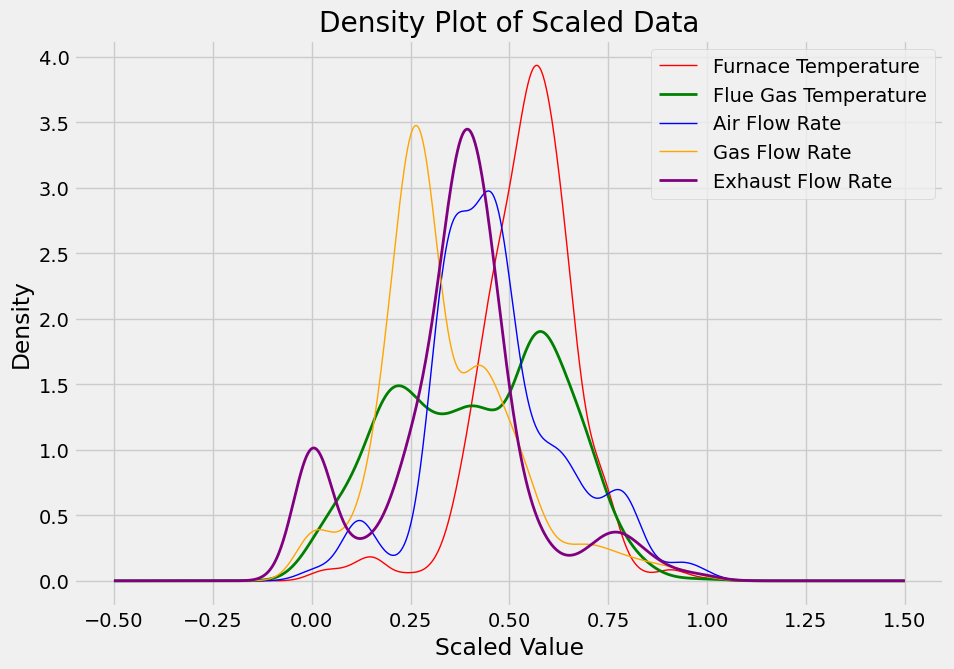

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
print(df_scaled)
df_scaled['炉温'].plot(label='Furnace Temperature', kind = 'kde', color = 'red')
df_scaled['烟气温度'].plot(label='Flue Gas Temperature', kind = 'kde', color = 'green', linewidth = 2)
df_scaled['空气流速'].plot(label='Air Flow Rate', kind = 'kde', color = 'blue')
df_scaled['燃气流速'].plot(label='Gas Flow Rate', kind = 'kde', color = 'orange')
df_scaled['排气流速'].plot(label='Exhaust Flow Rate', kind = 'kde', color = 'purple', linewidth = 2)
plt.title('Density Plot of Scaled Data')
plt.xlabel('Scaled Value')
plt.legend()
plt.show()

**根据核密度曲线可以判断：**

炉温，燃气流速，空气流速数据大致呈现正态分布；而**烟气温度**明显不呈正态分布，**排气流速**并不完全服从正态分布，如若需要对数据进行参数拟合，则需要对此原始数据进行进一步处理。做进一步处理可以考虑：Box-Cox变换或Yeo-Johnson变换。这些变换有助于稳定方差并使数据的分布形状更接近正态分布，从而满足某些统计分析方法的前提假设。

时间序列大多考虑平稳性和序列相关性，对于数据的正态分布的检验更多地被考虑在模型的参数估计中，即最小二乘法或最大似然函数法都建立在假设残差是正态分布的基础之上。常见的不服从正态分布的数据可以考虑t分布。

## 4. 绘制热力图，对变量之间的相关系数进行可视化

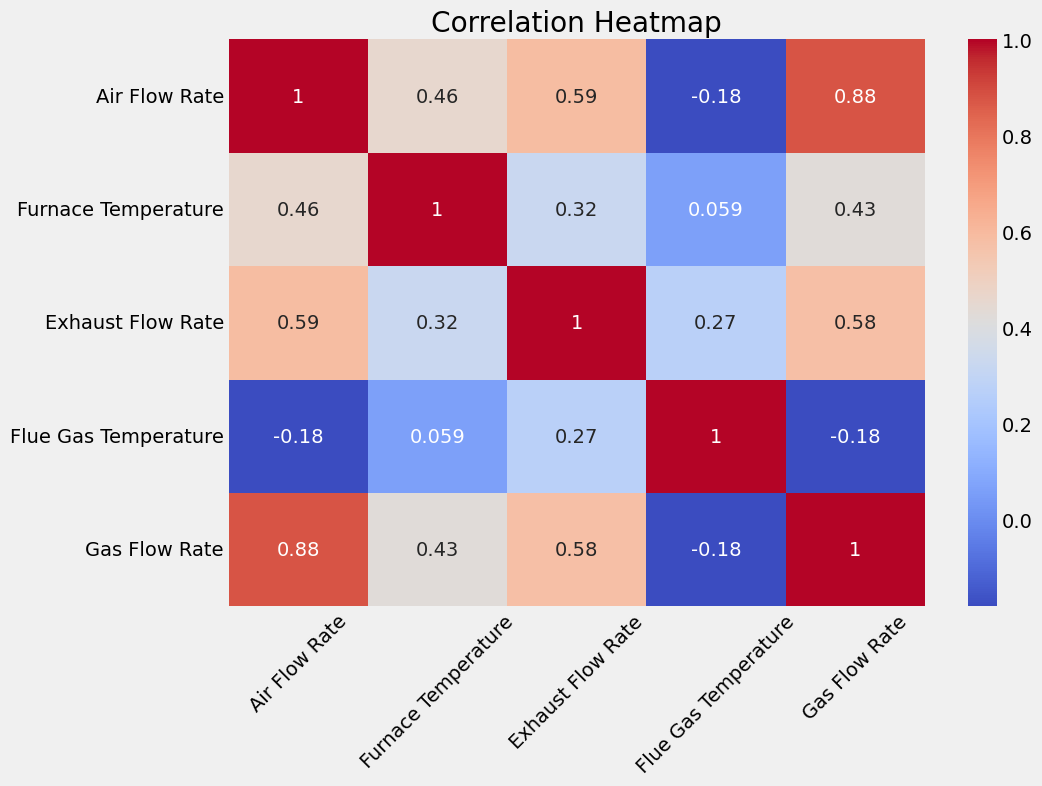

变量之间的相关性：
                      Air Flow Rate  Furnace Temperature  Exhaust Flow Rate  \
Air Flow Rate              1.000000             0.458109           0.588846   
Furnace Temperature        0.458109             1.000000           0.322067   
Exhaust Flow Rate          0.588846             0.322067           1.000000   
Flue Gas Temperature      -0.181542             0.059160           0.268689   
Gas Flow Rate              0.877587             0.427623           0.579966   

                      Flue Gas Temperature  Gas Flow Rate  
Air Flow Rate                    -0.181542       0.877587  
Furnace Temperature               0.059160       0.427623  
Exhaust Flow Rate                 0.268689       0.579966  
Flue Gas Temperature              1.000000      -0.181017  
Gas Flow Rate                    -0.181017       1.000000  


In [185]:
import seaborn as sns
df_scaled.columns = ['Air Flow Rate','Furnace Temperature','Exhaust Flow Rate','Flue Gas Temperature','Gas Flow Rate']
df.columns = ['Air Flow Rate','Furnace Temperature','Exhaust Flow Rate','Flue Gas Temperature','Gas Flow Rate']
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()
print('变量之间的相关性：')
print(df_scaled.corr())

由变量之间相关性检验可以观测到，“燃气流速”，“空气流速”两个变量的相关系数大于0.8，两个变量呈显著的正相关关系。

## 5. 稳定性检验

In [186]:
df.reset_index('Time',inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df

,Time,Air Flow Rate,Furnace Temperature,Exhaust Flow Rate,Flue Gas Temperature,Gas Flow Rate
0,2024-07-01 00:00:00,9767.2320,1148.67210,3871.6633,117.322556,1780.7550
1,2024-07-01 00:10:00,9576.9140,1057.70650,4004.9863,118.772316,1758.4187
2,2024-07-01 00:20:00,9383.2730,1002.73060,3851.6826,128.773710,1704.8152
3,2024-07-01 00:30:00,9364.9960,988.25900,3266.1670,130.734480,1695.7727
4,2024-07-01 00:40:00,9477.9360,999.49115,3446.9229,132.719900,1731.1584
...,...,...,...,...,...,...
1004,2024-07-07 23:20:00,6821.4870,1033.42820,2418.4985,139.069370,1421.8374
1005,2024-07-07 23:30:00,6768.0625,1030.01040,2581.2168,140.658040,1552.2200
1006,2024-07-07 23:40:00,6761.5390,1039.97850,2345.2970,141.667200,1614.1279
1007,2024-07-07 23:50:00,7020.3650,1062.13300,2530.9297,143.081880,1457.3876


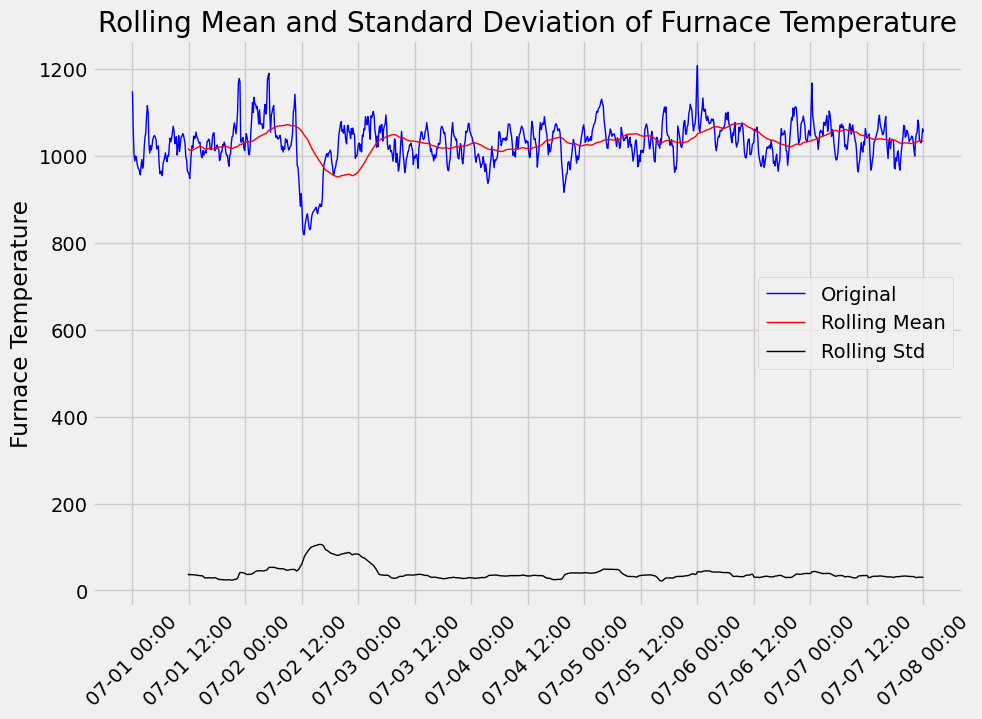

Dickey Fuller Test of Furnace Temperature
Test Statistics                  -6.532666
p-value                           0.000000
No. of lags used                  4.000000
Number of observations used    1004.000000
critical value (1%)              -3.436880
critical value (5%)              -2.864423
critical value (10%)             -2.568305
dtype: float64


In [187]:
from statsmodels.tsa.stattools import adfuller
from matplotlib.dates import DayLocator, DateFormatter, ConciseDateFormatter
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(72).mean()
    rolstd = timeseries.rolling(72).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.ylabel(f'{timeseries.name}')
    plt.xticks(range(0,df.shape[0],72),df['Time'].dt.strftime('%m-%d %H:%M').values[::72],rotation=45)
    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Standard Deviation of {timeseries.name}')
    plt.show(block=False)

    #perform dickey fuller test
    print(f"Dickey Fuller Test of {timeseries.name}")
    adft = adfuller(timeseries, autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence I manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
        output = output.round(6)
    print(output)

test_stationarity(df['Furnace Temperature'])

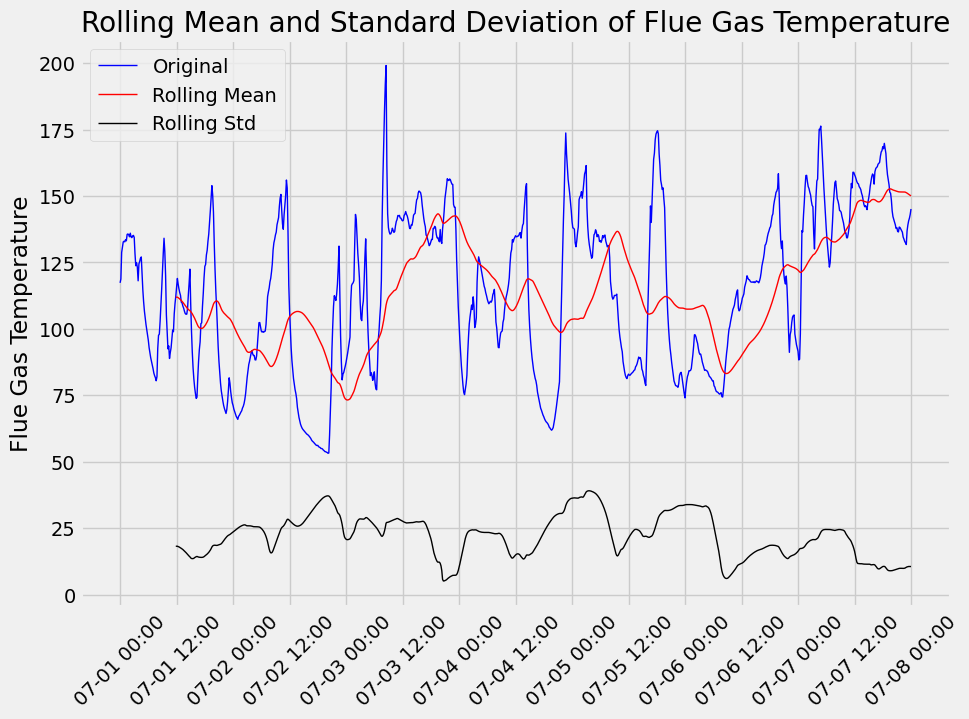

Dickey Fuller Test of Flue Gas Temperature
Test Statistics                  -5.131056
p-value                           0.000012
No. of lags used                  1.000000
Number of observations used    1007.000000
critical value (1%)              -3.436860
critical value (5%)              -2.864414
critical value (10%)             -2.568300
dtype: float64


In [188]:
test_stationarity(df['Flue Gas Temperature'])

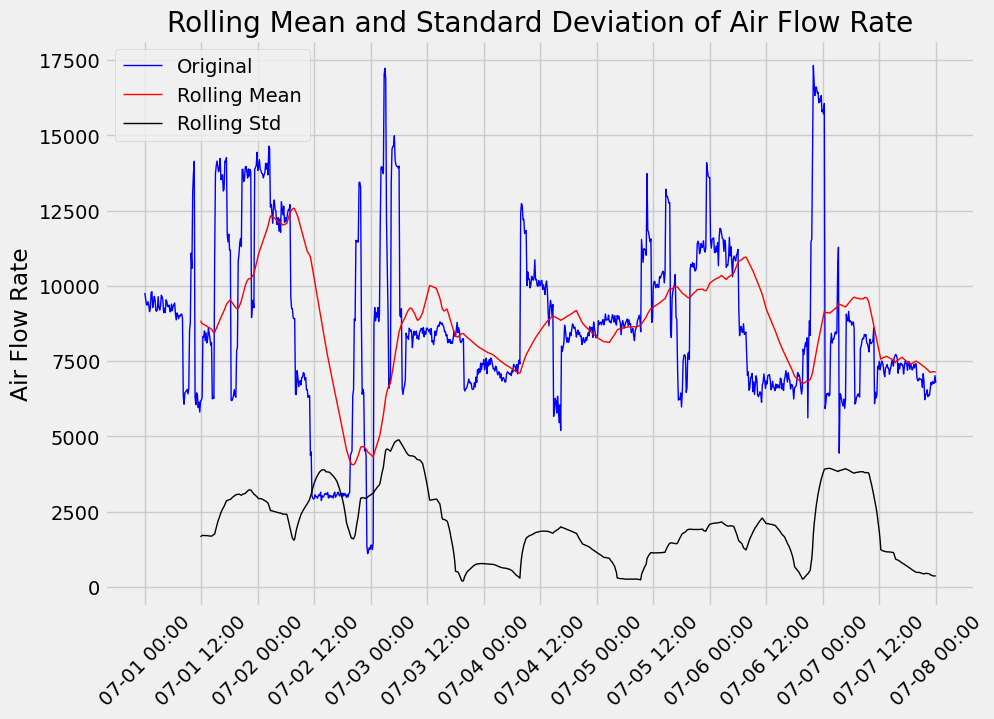

Dickey Fuller Test of Air Flow Rate
Test Statistics                  -5.614053
p-value                           0.000001
No. of lags used                  1.000000
Number of observations used    1007.000000
critical value (1%)              -3.436860
critical value (5%)              -2.864414
critical value (10%)             -2.568300
dtype: float64


In [189]:
test_stationarity(df['Air Flow Rate'])

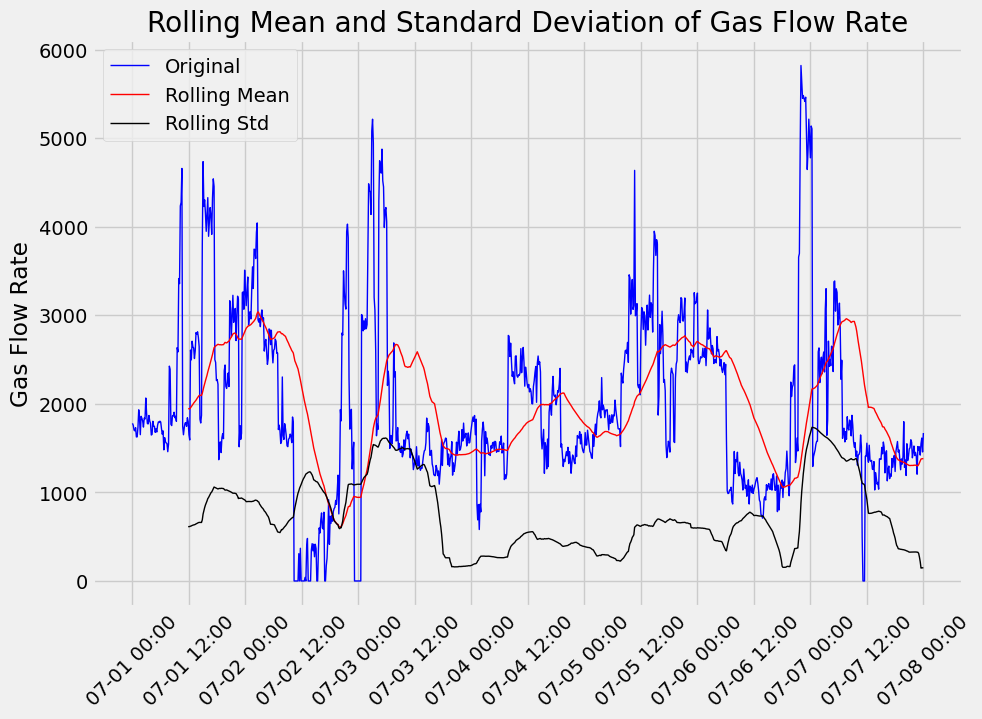

Dickey Fuller Test of Gas Flow Rate
Test Statistics                 -4.231872
p-value                          0.000582
No. of lags used                16.000000
Number of observations used    992.000000
critical value (1%)             -3.436959
critical value (5%)             -2.864458
critical value (10%)            -2.568324
dtype: float64


In [190]:
test_stationarity(df['Gas Flow Rate'])

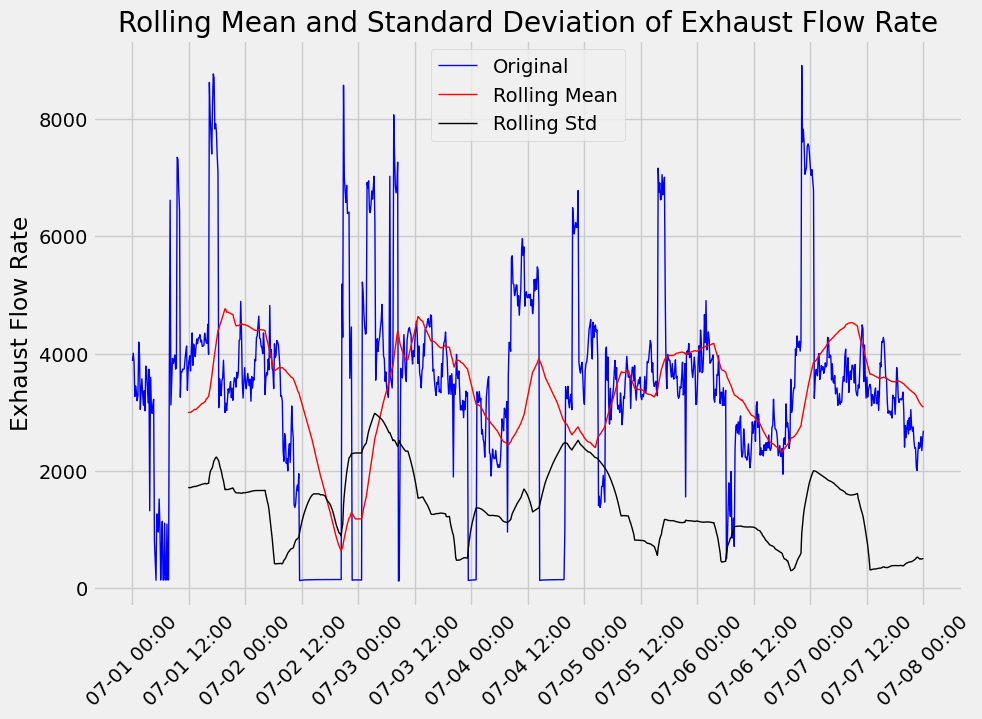

Dickey Fuller Test of Exhaust Flow Rate
Test Statistics                 -5.272657
p-value                          0.000006
No. of lags used                13.000000
Number of observations used    995.000000
critical value (1%)             -3.436939
critical value (5%)             -2.864449
critical value (10%)            -2.568319
dtype: float64


In [191]:
test_stationarity(df['Exhaust Flow Rate'])

以上五组输出结果分别来源于对五个变量进行ADF检验，进而得到相应的P值。

五组P值均小于0.05，故拒绝原假设，五个变量对应的原始数据均通过平稳性检验。

## 6. 异常值检验

6.1 使用3σ法则检测异常值

In [220]:
def outl_3sig_over(df):
    mean = df.mean()
    std = df.std()

    threshold1 = 3*std
    threshold2 = 2.5*std
    threshold3 = 2*std
    outliers_over_1 = df[df > mean + threshold1]
    outliers_over_2 = df[(df > mean + threshold2) & (df <= mean + threshold1)]
    outliers_over_3 = df[(df > mean + threshold3) & (df <= mean + threshold2)]

    print(f'{df.name}能耗过多的异常点：')
    #对异常赋予等级评定
    outliers_over_1 = outliers_over_1.to_frame()
    outliers_over_1['Level'] = '1'
    outliers_over_2 = outliers_over_2.to_frame()
    outliers_over_2['Level'] = '2'
    outliers_over_3 = outliers_over_3.to_frame()
    outliers_over_3['Level'] = '3'
    outliers_over = pd.concat([outliers_over_1, outliers_over_2, outliers_over_3])
    print(outliers_over)
    
    return outliers_over

def outl_3sig_under(df):
    mean = df.mean()
    std = df.std()

    threshold1 = 3*std
    threshold2 = 2.5*std
    threshold3 = 2*std
    outliers_under_1 = df[df < mean - threshold1]
    outliers_under_2 = df[(df < mean - threshold2) & (df >= mean - threshold1)]
    outliers_under_3 = df[(df < mean - threshold3) & (df >= mean - threshold2)]

    print(f'{df.name}能耗过少的异常点：')
    #对异常赋予等级评定
    outliers_under_1 = outliers_under_1.to_frame()
    outliers_under_1['Level'] = '1'
    outliers_under_2 = outliers_under_2.to_frame()
    outliers_under_2['Level'] = '2'
    outliers_under_3 = outliers_under_3.to_frame()
    outliers_under_3['Level'] = '3'
    outliers_under = pd.concat([outliers_under_1, outliers_under_2, outliers_under_3])
    print(outliers_under)
    
    return outliers_under

In [193]:
df.set_index('Time',inplace=True)

In [223]:
outliers_3sigma_over_FT = outl_3sig_over(df['Furnace Temperature'])
outliers_3sigma_under_FT = outl_3sig_under(df['Furnace Temperature'])
print(outliers_3sigma_over_FT)
print(outliers_3sigma_under_FT)

Furnace Temperature能耗过多的异常点：
                     Furnace Temperature Level
Time                                          
2024-07-01 22:40:00            1178.1006     1
2024-07-02 04:50:00            1184.1702     1
2024-07-02 05:00:00            1190.0765     1
2024-07-06 00:00:00            1207.8112     1
2024-07-01 22:30:00            1167.7230     2
2024-07-01 22:50:00            1170.0690     2
2024-07-02 04:40:00            1174.7747     2
2024-07-05 23:50:00            1163.2870     2
2024-07-07 00:20:00            1167.3826     2
2024-07-01 00:00:00            1148.6721     3
2024-07-02 01:50:00            1134.5665     3
2024-07-02 10:30:00            1141.7678     3
2024-07-05 03:40:00            1130.4140     3
2024-07-06 01:10:00            1133.2914     3
Furnace Temperature能耗过少的异常点：
                     Furnace Temperature Level
Time                                          
2024-07-02 11:40:00            883.75150     1
2024-07-02 12:00:00            884.50880     1
20

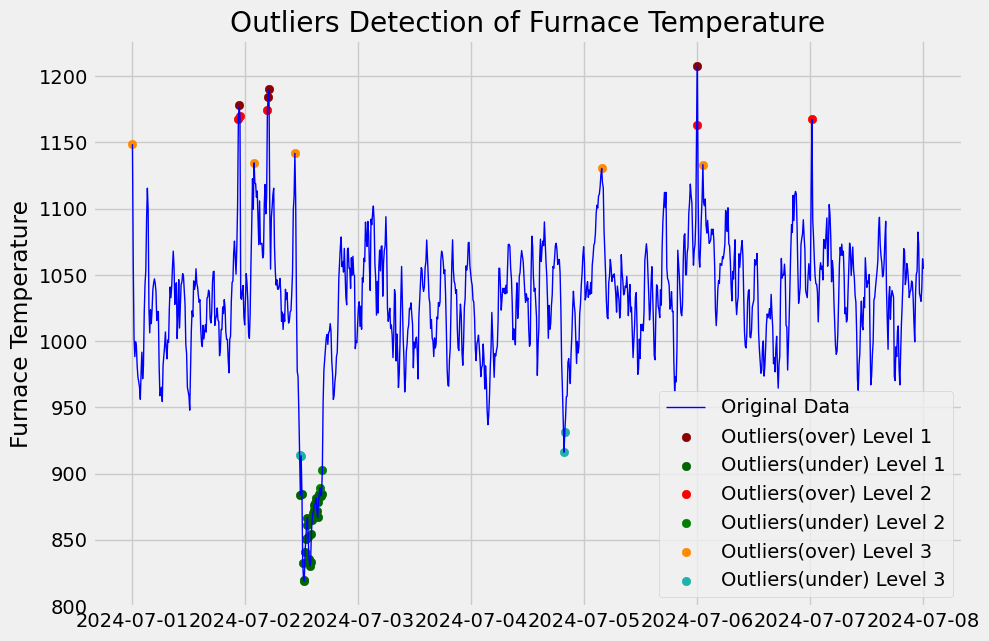

In [230]:
plt.plot(df['Furnace Temperature'], label='Original Data', color = 'blue')

colors_over = {'1':'darkred', '2': 'red', '3':'darkorange'}
colors_under = {'1':'darkgreen', '2':'green', '3':'lightseagreen'}
levels = ['1','2','3']

for level in levels:
    plt.scatter(outliers_3sigma_over_FT[outliers_3sigma_over_FT['Level']==level].index, outliers_3sigma_over_FT[outliers_3sigma_over_FT['Level']\
    ==level]['Furnace Temperature'], color = colors_over[level], label = f'Outliers(over) Level {level}')
    plt.scatter(outliers_3sigma_under_FT[outliers_3sigma_under_FT['Level']==level].index, outliers_3sigma_under_FT[outliers_3sigma_under_FT['Level']\
    ==level]['Furnace Temperature'], color = colors_under[level], label = f'Outliers(under) Level {level}')

plt.ylabel('Furnace Temperature')
plt.legend(loc='best')
plt.title('Outliers Detection of Furnace Temperature')
plt.show()


In [231]:
outliers_3sigma_over_GFR = outl_3sig_over(df['Gas Flow Rate'])
outliers_3sigma_under_GFR = outl_3sig_under(df['Gas Flow Rate'])
print(outliers_3sigma_over_GFR)
print(outliers_3sigma_under_GFR)

Gas Flow Rate能耗过多的异常点：
                     Gas Flow Rate Level
Time                                    
2024-07-03 02:50:00      5083.8745     1
2024-07-03 03:00:00      5215.9930     1
2024-07-06 22:00:00      5822.6230     1
2024-07-06 22:10:00      5625.5830     1
2024-07-06 22:20:00      5451.2370     1
2024-07-06 22:30:00      5483.2160     1
2024-07-06 22:40:00      5447.1553     1
2024-07-06 22:50:00      5416.4487     1
2024-07-06 23:00:00      5464.6377     1
2024-07-06 23:10:00      5073.4907     1
2024-07-06 23:40:00      5216.5396     1
2024-07-06 23:50:00      5007.5894     1
2024-07-07 00:10:00      5139.0576     1
2024-07-07 00:20:00      5106.8354     1
2024-07-01 10:30:00      4660.0103     2
2024-07-01 15:00:00      4736.7812     2
2024-07-01 17:10:00      4542.2915     2
2024-07-03 03:10:00      4947.4690     2
2024-07-03 04:30:00      4746.3560     2
2024-07-03 04:40:00      4666.1250     2
2024-07-03 04:50:00      4607.1920     2
2024-07-03 05:00:00      4878.0483

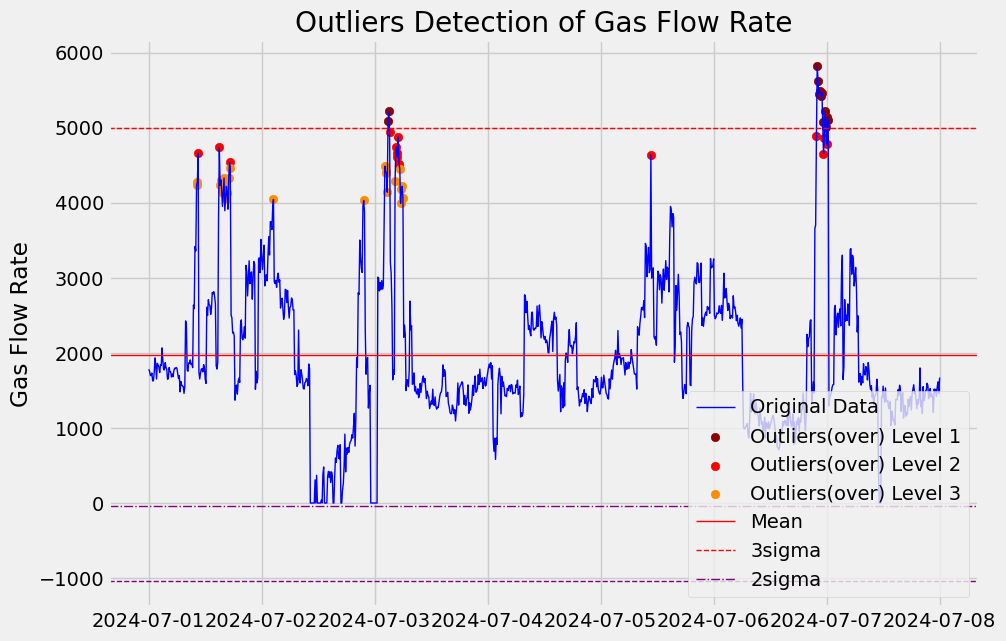

In [241]:
plt.plot(df['Gas Flow Rate'], label='Original Data', color = 'blue')

for level in levels:
    plt.scatter(outliers_3sigma_over_GFR[outliers_3sigma_over_GFR['Level']==level].index, outliers_3sigma_over_GFR[outliers_3sigma_over_GFR['Level']\
    ==level]['Gas Flow Rate'], color = colors_over[level], label = f'Outliers(over) Level {level}')
    # plt.scatter(outliers_3sigma_under_GFR[outliers_3sigma_under_GFR['Level']==level].index, outliers_3sigma_under_GFR[outliers_3sigma_under_GFR['Level']\
    # ==level]['Gas Flow Rate'], color = colors_under[level], label = f'Outliers(under) Level {level}')

#绘制均值线和3sigma线
mean_GFR = df['Gas Flow Rate'].mean()
std_GFR = df['Gas Flow Rate'].std()
threshold1_GFR = 3*std_GFR
threshold2_GFR = 2.5*std_GFR
threshold3_GFR = 2*std_GFR
plt.axhline(y=mean_GFR, color='r', linestyle='-', label='Mean')
plt.axhline(y=mean_GFR + threshold1_GFR, color='r', linestyle='--', label='3sigma')
plt.axhline(y=mean_GFR - threshold1_GFR, color='purple', linestyle='--')
plt.axhline(y=mean_GFR - threshold3_GFR, color='purple', linestyle='-.', label='2sigma')

plt.ylabel('Gas Flow Rate')
plt.legend(loc='lower right')
plt.title('Outliers Detection of Gas Flow Rate')
plt.show()